In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
tabela_tempos = pd.read_excel('dados.xlsx',header=0 )
qtd_valores,_ = tabela_tempos.shape
FATOR_ABRANGENCIA = 2

tabela_tempos

,Matlab,Python,C,Cpp,Js,Java
0,7.029,11.060476,1.877,2.13268,2.136,1.762594
1,4.101,11.640549,1.675,2.11027,2.186,1.702463
2,3.035,11.039972,2.136,2.39989,1.915,1.599560
3,6.206,11.120558,1.778,2.11022,2.102,1.372766
4,6.311,12.480736,2.168,2.06228,2.116,1.617516
5,3.136,11.615276,2.341,2.12334,1.957,1.721015
6,3.207,11.812449,2.171,1.90926,2.005,1.572582
7,6.125,10.656357,2.384,2.11478,2.592,1.518812
8,3.584,11.265993,2.144,2.11024,1.923,1.549340
9,3.437,11.477470,2.231,2.19124,2.121,1.554740


In [3]:
linguagens = list(tabela_tempos.columns)

tempos_medios = list()
incertezas = list()
resolucoes = [10**(-3)/2,10**(-6)/2,10**(-3)/2,10**(-5)/2,10**(-3)/2,10**(-6)/2]

In [4]:
for linguagem,resolucao in zip(linguagens,resolucoes):
    
    tempos = tabela_tempos[linguagem]

    tempo_medio = tempos.mean()
    desvio_padrao = tempos.std()

    incerteza_A = desvio_padrao/sqrt(qtd_valores)
    incerteza_B = resolucao/sqrt(3)

    incerteza_exp = FATOR_ABRANGENCIA*sqrt(incerteza_A**2 + incerteza_B**2)

    tempos_medios.append(tempo_medio)
    incertezas.append(incerteza_exp)

    print('1 milhão de iterações são relizadas em {:.3f} +- {:.4f} ms em {}'.format(tempo_medio,
                                                                                        incerteza_exp,linguagem))

1 milhão de iterações são relizadas em 4.617 +- 1.0088 ms em Matlab
1 milhão de iterações são relizadas em 11.417 +- 0.3224 ms em Python
1 milhão de iterações são relizadas em 2.091 +- 0.1494 ms em C
1 milhão de iterações são relizadas em 2.126 +- 0.0764 ms em Cpp
1 milhão de iterações são relizadas em 2.105 +- 0.1240 ms em Js
1 milhão de iterações são relizadas em 1.597 +- 0.0716 ms em Java


In [5]:
linguagens[0] = linguagens[0].upper()
linguagens[3] = 'C++'
linguagens[4] = 'Javascript'

resultados = pd.DataFrame({'Tempo Médio': tempos_medios,'Incerteza':incertezas},index = linguagens)
resultados.sort_values(by = ['Tempo Médio'],inplace = True)

resultados

,Tempo Médio,Incerteza
Java,1.597139,0.071616
C,2.090500,0.149360
Javascript,2.105300,0.124045
C++,2.126420,0.076370
MATLAB,4.617100,1.008768
Python,11.416984,0.322447


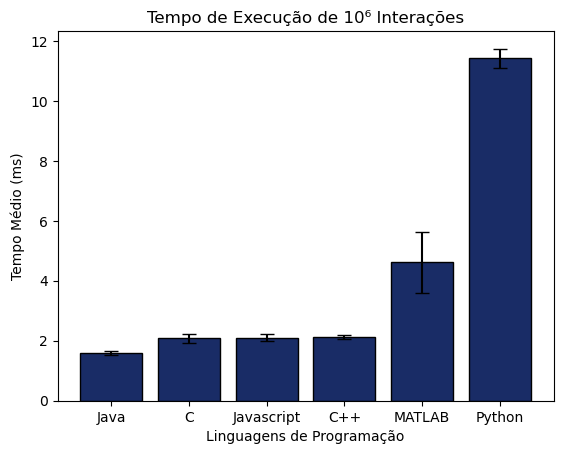

In [6]:
nomes = resultados.index
tempos = resultados["Tempo Médio"].values
incertezas = resultados["Incerteza"].values

r,g,b = (25, 44, 102)
plt.bar(nomes, tempos, yerr=incertezas, capsize = 5, color = (r/255,g/255,b/255), edgecolor='black');

plt.xlabel("Linguagens de Programação")
plt.ylabel("Tempo Médio (ms)")
plt.title("Tempo de Execução de 10⁶ Interações");